In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
SP_df = pd.read_csv("StockPricesDataSet.csv")
print(f"Dataset: \n{SP_df.head()}")
print(f"\ndataset shape: {SP_df.shape}")
print(f"\Information about the dataset: \n{SP_df.info()}")
print(f"\nmissing values in the dataset: \n{SP_df.isnull().sum()}")


<>:4: SyntaxWarning: invalid escape sequence '\I'
<>:4: SyntaxWarning: invalid escape sequence '\I'
C:\Users\hp\AppData\Local\Temp\ipykernel_15036\445417853.py:4: SyntaxWarning: invalid escape sequence '\I'
  print(f"\Information about the dataset: \n{SP_df.info()}")


Dataset: 
  symbol        date      open      high       low     close    volume
0    AAL  2014-01-02   25.0700   25.8200   25.0600   25.3600   8998943
1   AAPL  2014-01-02   79.3828   79.5756   78.8601   79.0185  58791957
2    AAP  2014-01-02  110.3600  111.8800  109.2900  109.7400    542711
3   ABBV  2014-01-02   52.1200   52.3300   51.5200   51.9800   4569061
4    ABC  2014-01-02   70.1100   70.2300   69.4800   69.8900   1148391

dataset shape: (497472, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB
\Information about th

In [132]:

# Function to handle missing values
#&
# remove duplicates

def remove_duplicates(SP_df):
    initial_shape = SP_df.shape
    SP_df = SP_df.drop_duplicates()
    final_shape = SP_df.shape
    print(f"Removed {initial_shape[0] - final_shape[0]} duplicate rows.")
    return SP_df
SP_df = remove_duplicates(SP_df)

def handeling_missing_values(SP_df):
    threshold = len(SP_df) * 0.5
    SP_df = SP_df.dropna(thresh=threshold, axis=1)
    
    for col in SP_df.select_dtypes(include=[np.number]):
        SP_df[col] = SP_df[col].fillna(SP_df[col].median())
    
    for col in SP_df.select_dtypes(include=['object']):
        SP_df[col] = SP_df[col].fillna(SP_df[col].mode()[0])

    return SP_df

SP_df_original = handeling_missing_values(SP_df)
SP_df_original['date'] = pd.to_datetime(SP_df_original['date'])

Removed 0 duplicate rows.


In [133]:
# Remove outliers for analysis
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to numerical columns
numerical_cols = SP_df_original.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    SP_df_original = remove_outliers(SP_df_original, col)

In [134]:
print("DATASET OVERVIEW")
print("-" * 30)
print(f"Dataset Shape: {SP_df_original.shape}")
print(f"Number of Records: {SP_df_original.shape[0]:,}")
print(f"Number of Features: {SP_df_original.shape[1]}")
print(f"\nData Types:")
print(SP_df_original.dtypes)

DATASET OVERVIEW
------------------------------
Dataset Shape: (408762, 7)
Number of Records: 408,762
Number of Features: 7

Data Types:
symbol            object
date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
dtype: object


Part 2: Exploratory Data Analysis (EDA)

In [135]:

print('='*10, "Summary Statistics", '='*10)
print(SP_df_original.describe())

========== Summary Statistics ==========
                                date           open           high  \
count                         408762  408762.000000  408762.000000   
mean   2015-12-27 08:33:10.470738432      67.979529      68.583167   
min              2014-01-02 00:00:00       1.670000       1.690000   
25%              2014-12-23 00:00:00      42.500000      42.900000   
50%              2015-12-24 00:00:00      63.260000      63.820000   
75%              2016-12-23 00:00:00      88.250000      88.980000   
max              2017-12-29 00:00:00     164.110000     164.950000   
std                              NaN      32.805117      33.061475   

                 low          close        volume  
count  408762.000000  408762.000000  4.087620e+05  
mean       67.368401      67.995862  2.681508e+06  
min         1.650000       1.660000  0.000000e+00  
25%        42.070000      42.500000  1.114966e+06  
50%        62.690000      63.270000  2.007608e+06  
75%        87.48

In [136]:
print("\nAdditional Statistics:")
stats_df = pd.DataFrame({
    'Mean': SP_df_original.select_dtypes(include=[np.number]).mean(),
    'Median': SP_df_original.select_dtypes(include=[np.number]).median(),
    'Variance': SP_df_original.select_dtypes(include=[np.number]).var(),
    'Std Dev': SP_df_original.select_dtypes(include=[np.number]).std(),
    'Skewness': SP_df_original.select_dtypes(include=[np.number]).skew(),
    'Kurtosis': SP_df_original.select_dtypes(include=[np.number]).kurtosis()
})
print(stats_df.round(4))


Additional Statistics:
                Mean      Median      Variance       Std Dev  Skewness  \
open    6.797950e+01       63.26  1.076176e+03  3.280510e+01    0.5852   
high    6.858320e+01       63.82  1.093061e+03  3.306150e+01    0.5850   
low     6.736840e+01       62.69  1.058650e+03  3.253690e+01    0.5840   
close   6.799590e+01       63.27  1.076351e+03  3.280780e+01    0.5840   
volume  2.681508e+06  2007608.00  4.364228e+12  2.089074e+06    1.2707   

        Kurtosis  
open     -0.3385  
high     -0.3387  
low      -0.3429  
close    -0.3425  
volume    1.0075  


In [138]:
print("UNIQUE VALUES ANALYSIS")
print("-" * 35)
unique_counts = SP_df_original.nunique()
print("Unique values per column:")
for col, count in unique_counts.items():
    print(f"{col}: {count:,}")

print(f"\nNumber of unique symbols: {SP_df_original['symbol'].nunique()}")
print(f"Date range: {SP_df_original['date'].min()} to {SP_df_original['date'].max()}")


UNIQUE VALUES ANALYSIS
-----------------------------------
Unique values per column:
symbol: 486
date: 1,007
open: 21,754
high: 44,900
low: 45,427
close: 22,296
volume: 391,930

Number of unique symbols: 486
Date range: 2014-01-02 00:00:00 to 2017-12-29 00:00:00


c:\Users\hp\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


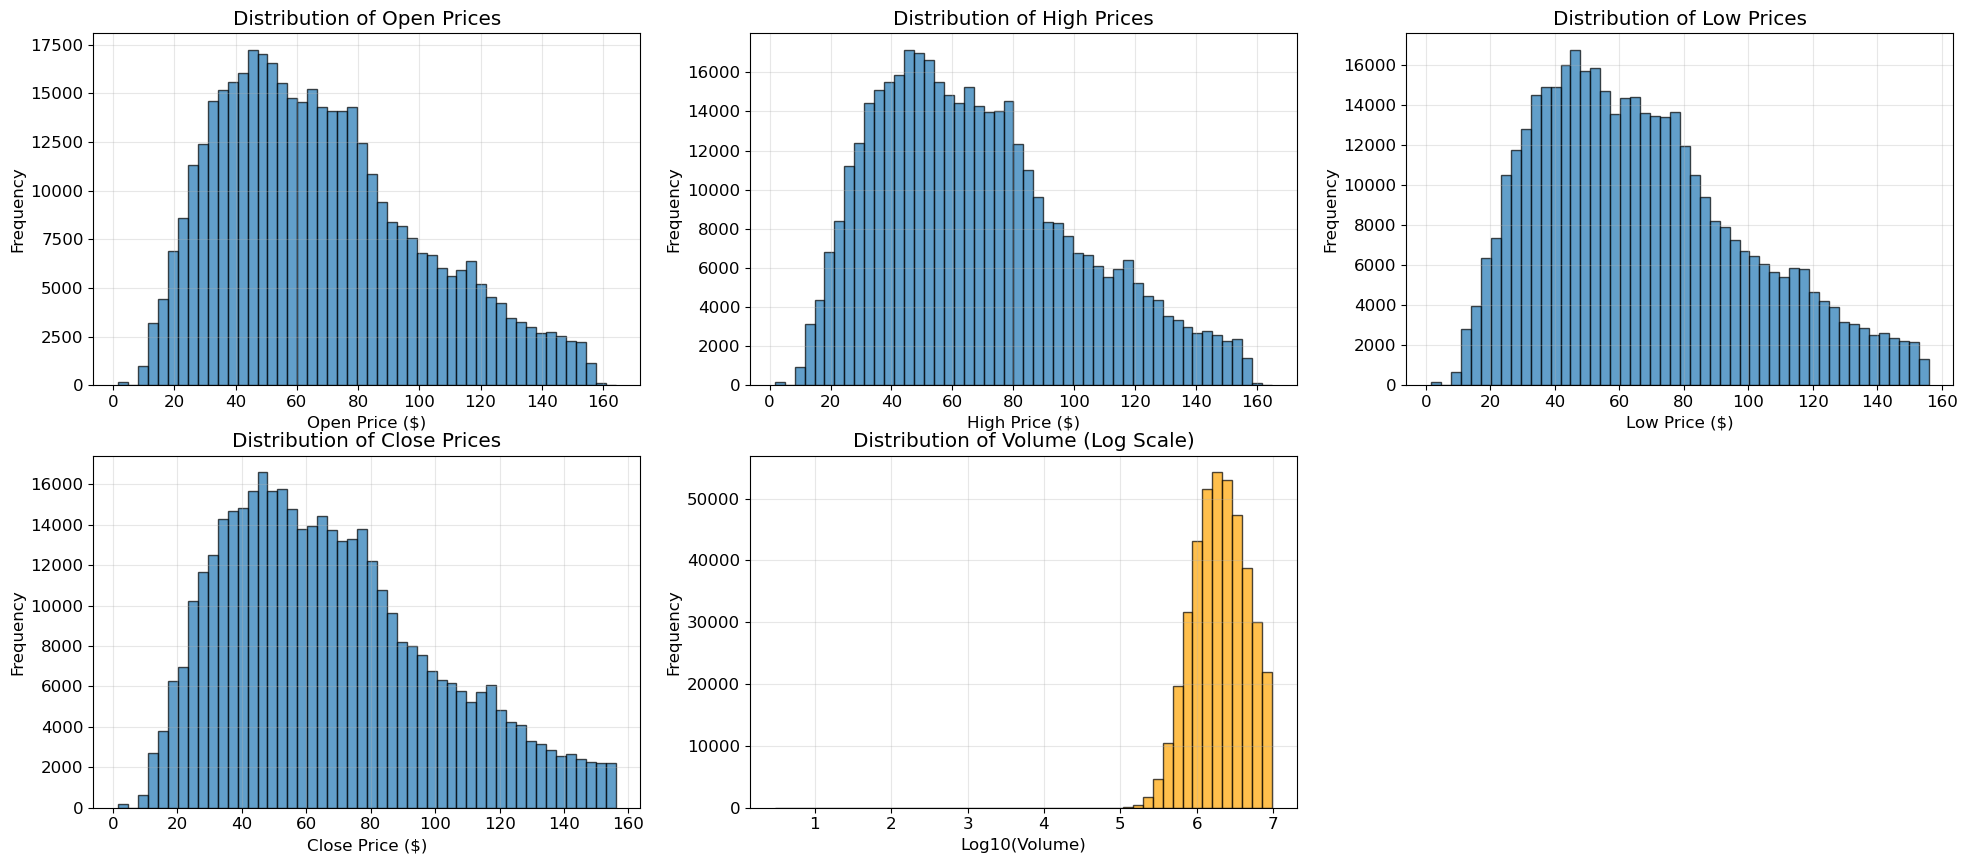

In [139]:
#Distribution Analysis - Histograms
fig = plt.figure(figsize=(24, 32))
plt.rcParams.update({'font.size': 12})
price_cols = ['open', 'high', 'low', 'close']
for i, col in enumerate(price_cols, 1):
    plt.subplot(6, 3, i)
    plt.hist(SP_df_original[col], bins=50, alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {col.capitalize()} Prices')
    plt.xlabel(f'{col.capitalize()} Price ($)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

plt.subplot(6, 3, 5)
#Remove -inf values before plotting log10(volume) histogram
log_volume = np.log10(SP_df_original['volume'])
log_volume = log_volume[np.isfinite(log_volume)]
plt.hist(log_volume, bins=50, alpha=0.7, edgecolor='black', color='orange')
plt.title('Distribution of Volume (Log Scale)')
plt.xlabel('Log10(Volume)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

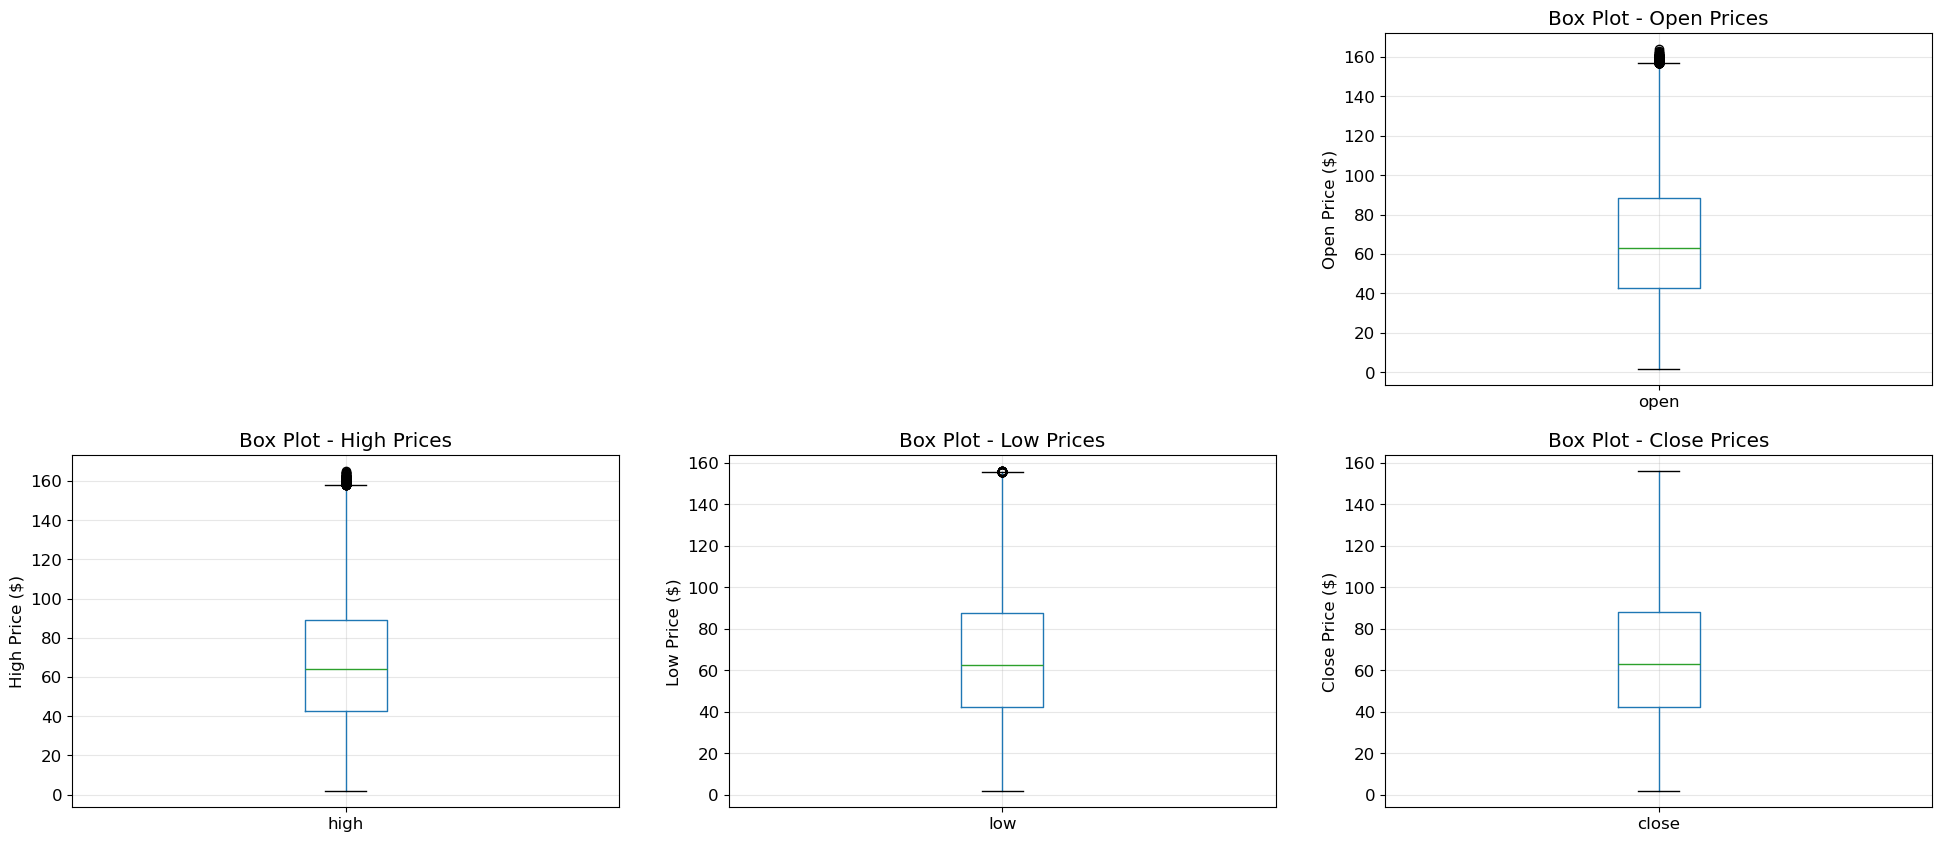

In [140]:
#Box Plots for Price Columns
fig = plt.figure(figsize=(24, 32))
for i, col in enumerate(price_cols, 6):
    plt.subplot(6, 3, i)
    SP_df_original.boxplot(column=col, ax=plt.gca())
    plt.title(f'Box Plot - {col.capitalize()} Prices')
    plt.ylabel(f'{col.capitalize()} Price ($)')
    plt.grid(True, alpha=0.3)

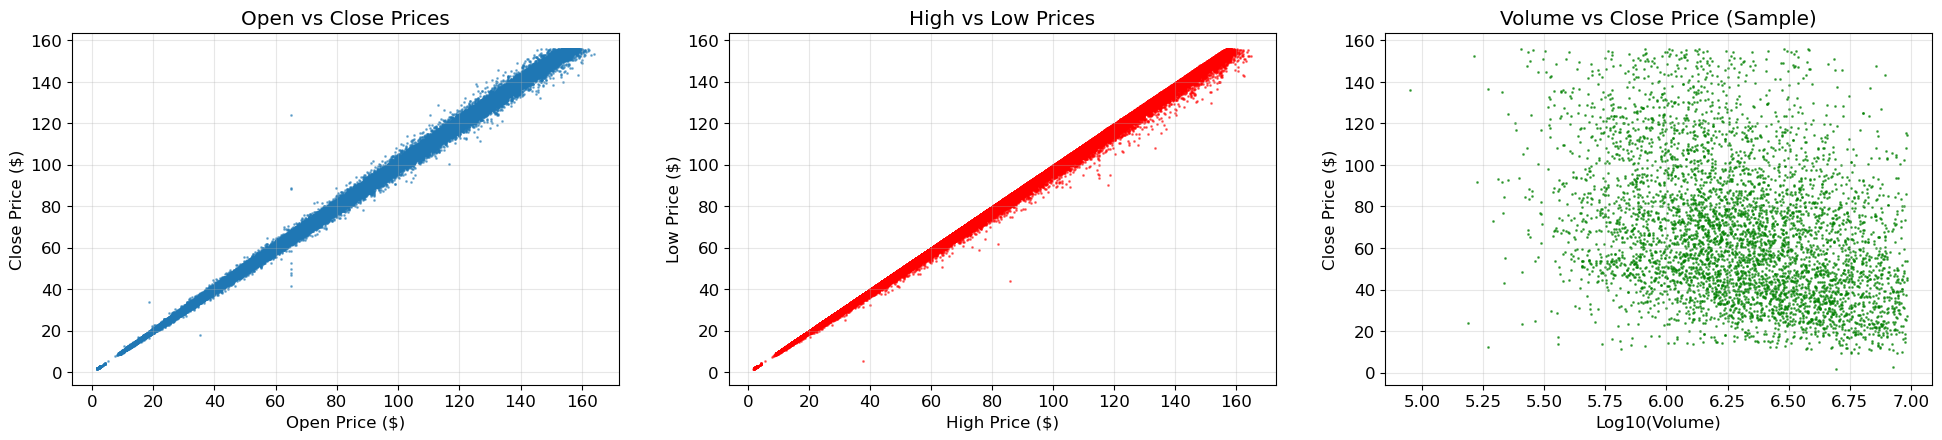

In [141]:
#Scatter Plots
fig = plt.figure(figsize=(24, 32))
plt.subplot(6, 3, 10)
plt.scatter(SP_df_original['open'], SP_df_original['close'], alpha=0.5, s=1)
plt.title('Open vs Close Prices')
plt.xlabel('Open Price ($)')
plt.ylabel('Close Price ($)')
plt.grid(True, alpha=0.3)

plt.subplot(6, 3, 11)
plt.scatter(SP_df_original['high'], SP_df_original['low'], alpha=0.5, s=1, color='red')
plt.title('High vs Low Prices')
plt.xlabel('High Price ($)')
plt.ylabel('Low Price ($)')
plt.grid(True, alpha=0.3)

plt.subplot(6, 3, 12)
sample_data = SP_df_original.sample(n=5000, random_state=42)  # Sample for better visualization
plt.scatter(np.log10(sample_data['volume']), sample_data['close'], alpha=0.6, s=1, color='green')
plt.title('Volume vs Close Price (Sample)')
plt.xlabel('Log10(Volume)')
plt.ylabel('Close Price ($)')
plt.grid(True, alpha=0.3)

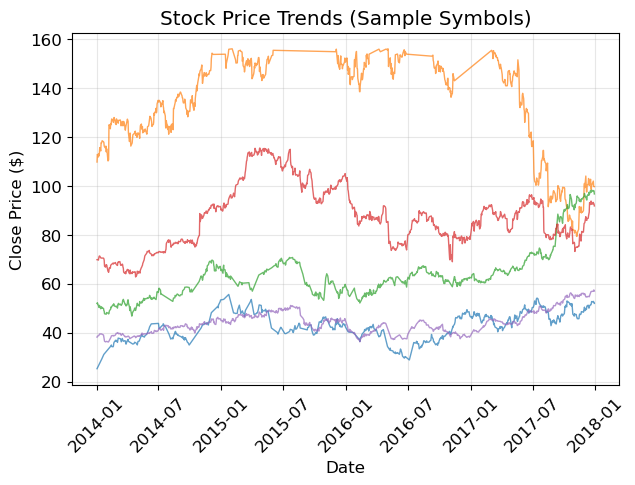

In [142]:
#Time Series Analysis
fig = plt.figure(figsize=(24, 32))
plt.subplot(6, 3, 13)
sample_symbols = SP_df_original['symbol'].unique()[:5]
for symbol in sample_symbols:
    symbol_data = SP_df_original[SP_df_original['symbol'] == symbol].sort_values('date')
    plt.plot(symbol_data['date'], symbol_data['close'], alpha=0.7, linewidth=1)
plt.title('Stock Price Trends (Sample Symbols)')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

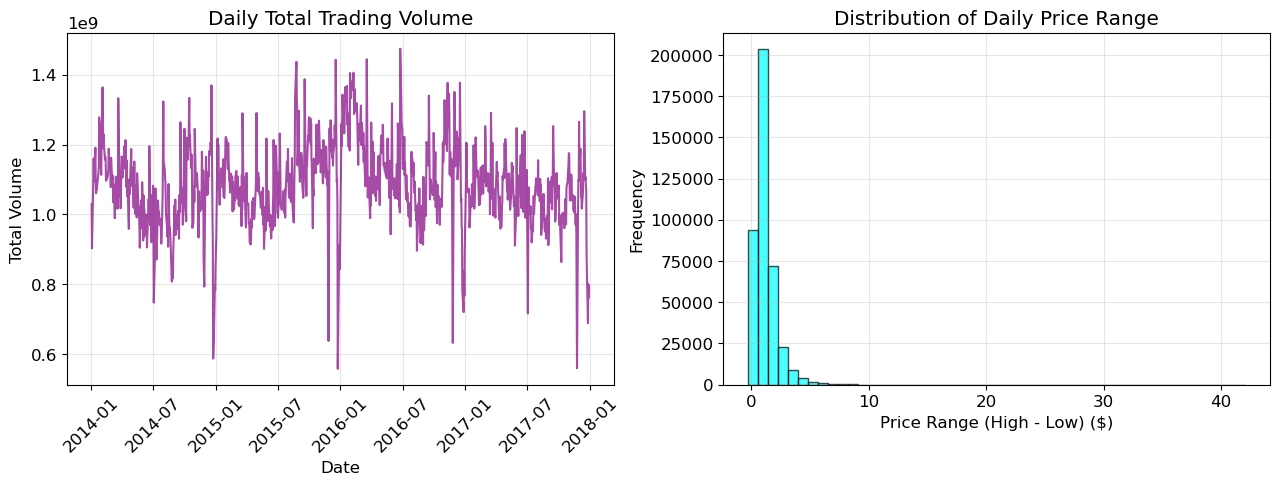

In [143]:
#Volume Analysis
fig = plt.figure(figsize=(24, 32))
plt.subplot(6, 3, 14)
daily_volume = SP_df_original.groupby('date')['volume'].sum()
plt.plot(daily_volume.index, daily_volume.values, alpha=0.7, color='purple')
plt.title('Daily Total Trading Volume')
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

#Price Range Analysis
plt.subplot(6, 3, 15)
SP_df_original['price_range'] = SP_df_original['high'] - SP_df_original['low']
plt.hist(SP_df_original['price_range'], bins=50, alpha=0.7, color='cyan', edgecolor='black')
plt.title('Distribution of Daily Price Range')
plt.xlabel('Price Range (High - Low) ($)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)


Text(0.5, 1.0, 'Correlation Matrix - Price & Volume')

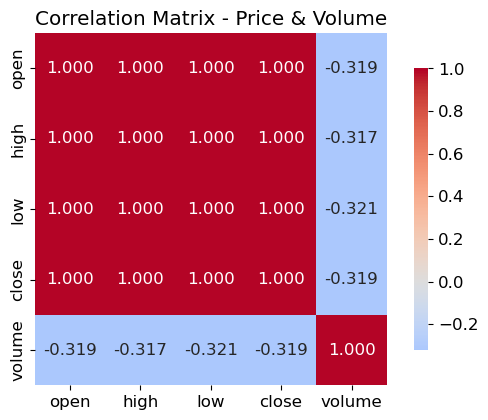

In [144]:
#Correlation Heatmap
fig = plt.figure(figsize=(24, 32))
plt.subplot(6, 3, 16)
correlation_matrix = SP_df_original[['open', 'high', 'low', 'close', 'volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix - Price & Volume')

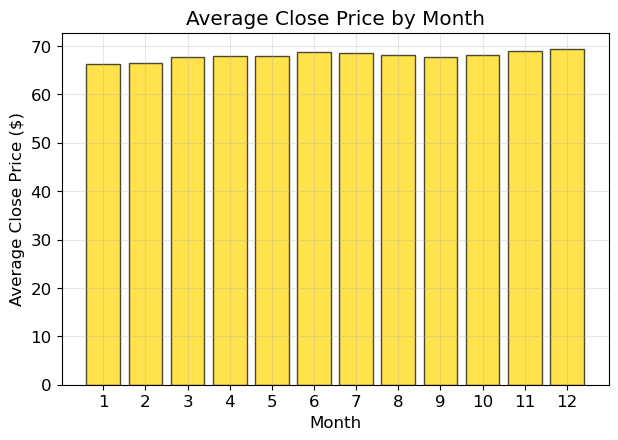

In [145]:
#Monthly Analysis
fig = plt.figure(figsize=(24, 32))
SP_df_original['month'] = SP_df_original['date'].dt.month
plt.subplot(6, 3, 17)
monthly_avg = SP_df_original.groupby('month')['close'].mean()
plt.bar(monthly_avg.index, monthly_avg.values, alpha=0.7, color='gold', edgecolor='black')
plt.title('Average Close Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Close Price ($)')
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)

In [146]:
#CORRELATION ANALYSIS
print("CORRELATION ANALYSIS")
print("-" * 30)
print("\nCorrelation Matrix (Price & Volume):")
print(correlation_matrix.round(4))

print("\nStrong Correlations (|r| > 0.8):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.8:
            print(f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {corr_val:.4f}")


CORRELATION ANALYSIS
------------------------------

Correlation Matrix (Price & Volume):
          open    high     low   close  volume
open    1.0000  0.9998  0.9998  0.9996 -0.3186
high    0.9998  1.0000  0.9997  0.9998 -0.3167
low     0.9998  0.9997  1.0000  0.9998 -0.3207
close   0.9996  0.9998  0.9998  1.0000 -0.3188
volume -0.3186 -0.3167 -0.3207 -0.3188  1.0000

Strong Correlations (|r| > 0.8):
open - high: 0.9998
open - low: 0.9998
open - close: 0.9996
high - low: 0.9997
high - close: 0.9998
low - close: 0.9998


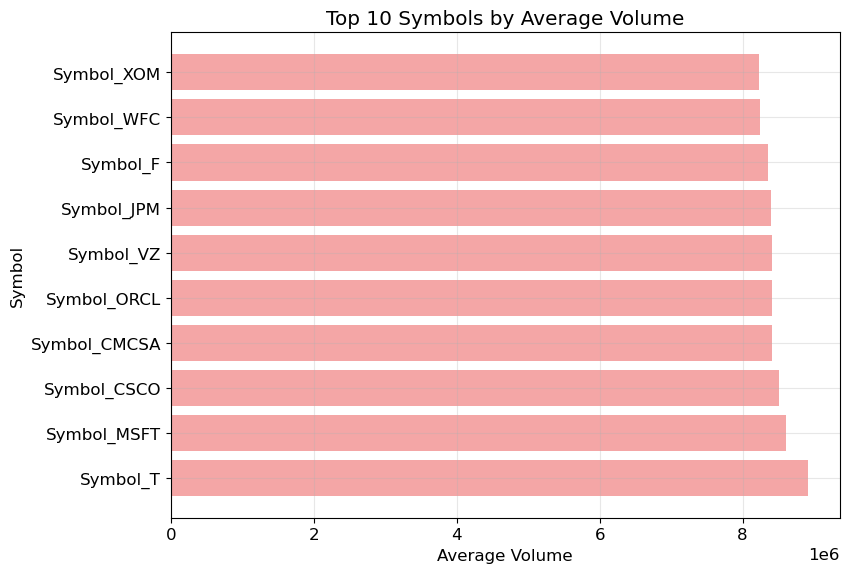

In [147]:
#Top Symbols by Average Volume
fig = plt.figure(figsize=(24, 32))
plt.subplot(6, 3, 18)
top_volume_symbols = SP_df_original.groupby('symbol')['volume'].mean().sort_values(ascending=False).head(10)
symbol_names = [f'Symbol_{i}' for i in top_volume_symbols.index]
plt.barh(range(len(top_volume_symbols)), top_volume_symbols.values, alpha=0.7, color='lightcoral')
plt.title('Top 10 Symbols by Average Volume')
plt.xlabel('Average Volume')
plt.ylabel('Symbol')
plt.yticks(range(len(top_volume_symbols)), symbol_names)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [148]:
print("KEY INSIGHTS FROM EDA")
print("-" * 30)

# Price volatility analysis
SP_df_original['daily_return'] = (SP_df_original['close'] - SP_df_original['open']) / SP_df_original['open']
SP_df_original['volatility'] = (SP_df_original['high'] - SP_df_original['low']) / SP_df_original['open']

print(f"\nDaily Return Statistics:")
print(f"Mean Daily Return: {SP_df_original['daily_return'].mean():.4f}")
print(f"Std Dev of Daily Returns: {SP_df_original['daily_return'].std():.4f}")
print(f"Max Daily Gain: {SP_df_original['daily_return'].max():.4f}")
print(f"Max Daily Loss: {SP_df_original['daily_return'].min():.4f}")

print(f"\nVolatility Statistics:")
print(f"Mean Volatility: {SP_df_original['volatility'].mean():.4f}")
print(f"Std Dev of Volatility: {SP_df_original['volatility'].std():.4f}")

# Volume patterns
print(f"\nVolume Statistics:")
print(f"Average Daily Volume: {SP_df_original['volume'].mean():,.0f}")
print(f"Median Daily Volume: {SP_df_original['volume'].median():,.0f}")
print(f"Volume Standard Deviation: {SP_df_original['volume'].std():,.0f}")


KEY INSIGHTS FROM EDA
------------------------------

Daily Return Statistics:
Mean Daily Return: 0.0003
Std Dev of Daily Returns: 0.0126
Max Daily Gain: 0.9098
Max Daily Loss: -0.4922

Volatility Statistics:
Mean Volatility: 0.0185
Std Dev of Volatility: 0.0108

Volume Statistics:
Average Daily Volume: 2,681,508
Median Daily Volume: 2,007,608
Volume Standard Deviation: 2,089,074
